$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [ ]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [ ]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array

  t1 = np.matmul(gradf,gradf)/2
  t2 = np.matmul(np.matmul(A,gradf),gradf)

  step_length = t1/t2
  
  return step_length

In [ ]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  #implement the backtracking line search

  while evalf(x+alpha*(-gradf)) > evalf(x) + gamma*alpha*np.matmul(gradf.transpose(),-gradf):
    alpha = rho*alpha


  #print('final step length:',alpha)
  return alpha

In [ ]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x


In [ ]:
my_start_x = np.array([1,1])
my_tol= 1e-5


x_opt = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print(x_opt)

iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
iter: 1  x: [ 2.4 -1.6]  f(x): 139.52  grad at x: [-11.2  20.8]  gradient norm: 23.62371689637344
iter: 2  x: [ 3.52 -3.68]  f(x): 89.2928  grad at x: [-8.96 16.64]  gradient norm: 18.898973517098753
iter: 3  x: [ 4.416 -5.344]  f(x): 57.147391999999996  grad at x: [-7.168 13.312]  gradient norm: 15.119178813679001
iter: 4  x: [ 5.1328 -6.6752]  f(x): 36.57433088  grad at x: [-5.7344 10.6496]  gradient norm: 12.095343050943201
iter: 5  x: [ 5.70624 -7.74016]  f(x): 23.407571763199996  grad at x: [-4.58752  8.51968]  gradient norm: 9.676274440754561
iter: 6  x: [ 6.164992 -8.592128]  f(x): 14.980845928447996  grad at x: [-3.670016  6.815744]  gradient norm: 7.741019552603648
iter: 7  x: [ 6.5319936 -9.2737024]  f(x): 9.587741394206713  grad at x: [-2.9360128  5.4525952]  gradient norm: 6.192815642082918
iter: 8  x: [ 6.82559488 -9.81896192]  f(x): 6.136154492292296  grad at x: [-2.34881024  4.36207616]  

In [ ]:
x_opt_els = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(x_opt_els)

iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
iter: 1  x: [  8. -12.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
[  8. -12.]


In [ ]:
x_opt_bls = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(x_opt_bls)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
iter: 1  x: [  8. -12.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
[  8. -12.]


${\Large\text{Do not forget to rename the file before submission.}}$

#Ans 3:

Optimizer : [8,-12]

Minimum Function Value : 0

In [ ]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,evalf(x),k


In [ ]:
q2_tol = 1e-12
q2_start_x = np.array([25,25])

In [ ]:
x,f,k = find_minimizer(q2_start_x, q2_tol, EXACT_LINE_SEARCH)
print('Iterations taken by Exact Line Search:',k)

Iterations taken by Exact Line Search: 1


In [ ]:
x,f,k = find_minimizer(q2_start_x, q2_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('Iterations taken by Backtracking Line Search:',k)

Iterations taken by Backtracking Line Search: 1


#Ans 4:

We can observe that both the methods terminate and give the result after just one iteration for the given function.

In [ ]:
q3_start_x = np.array([25,25])
q3_tol = 1e-10
alpha_0 = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
k_els = []
k_bls = []
x_opt = []
f_min = []
for i in alpha_0:
  a_els,b_els,c_els = find_minimizer(q3_start_x, q3_tol, EXACT_LINE_SEARCH)
  a_bls,b_bls,c_bls = find_minimizer(q3_start_x, q3_tol, BACKTRACKING_LINE_SEARCH, i, 0.5,0.5)
  x_opt.append(a_bls)
  f_min.append(b_bls)
  k_els.append(c_els)
  k_bls.append(c_bls)

Text(0, 0.5, 'Iterations')

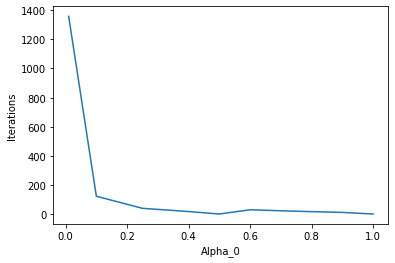

In [ ]:
import matplotlib.pyplot as plt

plt.plot(alpha_0,k_bls)
plt.xlabel('Alpha_0')
plt.ylabel('Iterations')

In [ ]:
for i in range(len(alpha_0)):
  print('For alpha_0 =',alpha_0[i],'\nFinal Optimizer :',x_opt[i],'\nFinal Function Value :',f_min[i],'\n')

For alpha_0 = 1 
Final Optimizer : [  8. -12.] 
Final Function Value : 0.0 

For alpha_0 = 0.9 
Final Optimizer : [  8. -12.] 
Final Function Value : 1.6579714975258972e-21 

For alpha_0 = 0.75 
Final Optimizer : [  8. -12.] 
Final Function Value : 1.3714654556129199e-21 

For alpha_0 = 0.6 
Final Optimizer : [  8. -12.] 
Final Function Value : 2.2038291998576117e-21 

For alpha_0 = 0.5 
Final Optimizer : [  8. -12.] 
Final Function Value : 0.0 

For alpha_0 = 0.4 
Final Optimizer : [  8. -12.] 
Final Function Value : 1.1393259623274523e-22 

For alpha_0 = 0.25 
Final Optimizer : [  8. -12.] 
Final Function Value : 1.3714654556129199e-21 

For alpha_0 = 0.1 
Final Optimizer : [  8. -12.] 
Final Function Value : 2.3972320602008796e-21 

For alpha_0 = 0.01 
Final Optimizer : [  8. -12.] 
Final Function Value : 2.4523367712209537e-21 



In [ ]:
for i in range(len(alpha_0)):
  print('For alpha_0:',alpha_0[i],'\nNo. of iterations used by Exact Line Search:',k_els[i],'\nNo. of iterations used by Backtracking Line Search:',k_bls[i],'\n')

For alpha_0: 1 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 1 

For alpha_0: 0.9 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 12 

For alpha_0: 0.75 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 20 

For alpha_0: 0.6 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 30 

For alpha_0: 0.5 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 1 

For alpha_0: 0.4 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 18 

For alpha_0: 0.25 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 40 

For alpha_0: 0.1 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 123 

For alpha_0: 0.01

#Ans 5:

We can observe from the plot between iterations taken by backtracking line search and $\alpha^{0}$ that as the value of $\alpha^{0}$ reduces the no. of iterations increases rapidly.


We can observe that except for when $\alpha^{0}$ = 1 and 0.5, the minimum function value is away from 0 by a factor of $10^{-21}$.

We can observe that backtracking line search never takes lesser iterations than exact line search and only equals the no. of iterations as that of exact line search when $\alpha^{0} = \{1,0.5\}$.

In [ ]:
q4_start_x = np.array([25,25])
q4_tol = 1e-10
rho = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
k_els = []
k_bls = []
x_opt = []
f_min = []
for i in rho:
  a_els,b_els,c_els = find_minimizer(q3_start_x, q3_tol, EXACT_LINE_SEARCH)
  a_bls,b_bls,c_bls = find_minimizer(q3_start_x, q3_tol, BACKTRACKING_LINE_SEARCH, 1, i,0.5)
  x_opt.append(a_bls)
  f_min.append(b_bls)
  k_els.append(c_els)
  k_bls.append(c_bls)

Text(0, 0.5, 'Iterations')

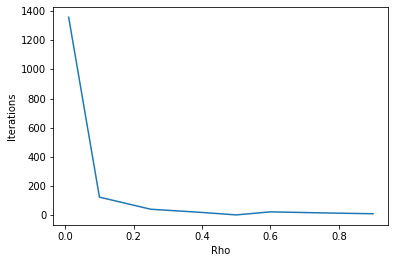

In [ ]:
plt.plot(rho,k_bls)
plt.xlabel('Rho')
plt.ylabel('Iterations')

In [ ]:
for i in range(len(rho)):
  print('For rho =',rho[i],'\nFinal Optimizer :',x_opt[i],'\nFinal Function Value :',f_min[i],'\n')

For rho = 0.9 
Final Optimizer : [  8. -12.] 
Final Function Value : 4.960536411900771e-22 

For rho = 0.75 
Final Optimizer : [  8. -12.] 
Final Function Value : 1.0819468296335504e-21 

For rho = 0.6 
Final Optimizer : [  8. -12.] 
Final Function Value : 7.844395544174143e-22 

For rho = 0.5 
Final Optimizer : [  8. -12.] 
Final Function Value : 0.0 

For rho = 0.4 
Final Optimizer : [  8. -12.] 
Final Function Value : 1.1393259623274523e-22 

For rho = 0.25 
Final Optimizer : [  8. -12.] 
Final Function Value : 1.3714654556129199e-21 

For rho = 0.1 
Final Optimizer : [  8. -12.] 
Final Function Value : 2.3972320602008796e-21 

For rho = 0.01 
Final Optimizer : [  8. -12.] 
Final Function Value : 2.4523367712209537e-21 



In [ ]:
for i in range(len(rho)):
  print('For rho:',rho[i],'\nNo. of iterations used by Exact Line Search:',k_els[i],'\nNo. of iterations used by Backtracking Line Search:',k_bls[i],'\n')

For rho: 0.9 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 9 

For rho: 0.75 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 15 

For rho: 0.6 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 22 

For rho: 0.5 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 1 

For rho: 0.4 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 18 

For rho: 0.25 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 40 

For rho: 0.1 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 123 

For rho: 0.01 
No. of iterations used by Exact Line Search: 1 
No. of iterations used by Backtracking Line Search: 1358 



#Ans 6:

We can observe from the plot between iterations taken by backtracking line search and $\rho$ that as the value of $\rho$ reduces the no. of iterations increases rapidly.


We can observe that except for when $\rho$ = 0.5, the minimum function value is away from 0 by a factor of $10^{-21}$.

We can observe that backtracking line search never takes lesser iterations than exact line search and only equals the no. of iterations as that of exact line search when $\rho = 0.5$.